In [2]:
# 逻辑回归是分类问题里面一个特殊的二分类问题
# 这回还用 sklearn 里面的乳腺癌数据集来演示逻辑回归
import tensorflow as tf
from keras import Input, layers
from sklearn.datasets import load_breast_cancer  # 0是恶性 1是良性

# 加载乳腺癌数据集
data = load_breast_cancer()
X = data.data
y = data.target
print(X, y)
print(data.feature_names)
print(X.shape, y.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [4]:
# 构建逻辑回归模型
model = tf.keras.Sequential([
    Input(shape=(X.shape[1],)),  # 输入维度是30 因为特征就是30个
    layers.Dense(units=1, activation='sigmoid')  # 输出层 逻辑回归使用 sigmoid 激活函数 输出一个概率值
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# 编译模型
model.compile(
    optimizer='adam',  # 优化器
    loss='binary_crossentropy',  # 二分类交叉熵损失函数
    metrics=['accuracy']  # 评估指标 使用准确率
)

In [6]:
# 模型训练
history = model.fit(
    X, y,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
print(f"最终准确率: {history.history['accuracy'][-1]:.4f}")

Epoch 1/100
15/15 [==============================] - 0s 4ms/step - loss: 168.2171 - accuracy: 0.4088 - val_loss: 218.2206 - val_accuracy: 0.2281
Epoch 2/100
15/15 [==============================] - 0s 968us/step - loss: 157.2488 - accuracy: 0.4088 - val_loss: 203.2388 - val_accuracy: 0.2281
Epoch 3/100
15/15 [==============================] - 0s 932us/step - loss: 145.9917 - accuracy: 0.4088 - val_loss: 188.4159 - val_accuracy: 0.2281
Epoch 4/100
15/15 [==============================] - 0s 933us/step - loss: 134.8337 - accuracy: 0.4088 - val_loss: 173.3717 - val_accuracy: 0.2281
Epoch 5/100
15/15 [==============================] - 0s 986us/step - loss: 123.7116 - accuracy: 0.4088 - val_loss: 158.3512 - val_accuracy: 0.2281
Epoch 6/100
15/15 [==============================] - 0s 930us/step - loss: 112.6285 - accuracy: 0.4088 - val_loss: 143.3648 - val_accuracy: 0.2281
Epoch 7/100
15/15 [==============================] - 0s 920us/step - loss: 101.5718 - accuracy: 0.4088 - val_loss: 128.3

{'loss': [168.21714782714844, 157.24876403808594, 145.99172973632812, 134.83372497558594, 123.71156311035156, 112.62850952148438, 101.57176971435547, 90.30429077148438, 79.22526550292969, 68.00189208984375, 56.64906311035156, 45.47163009643555, 34.438663482666016, 23.539411544799805, 12.26321792602539, 2.39552640914917, 0.6151706576347351, 0.3663339614868164, 0.29172319173812866, 0.27119991183280945, 0.2674223780632019, 0.26327019929885864, 0.270442932844162, 0.26223012804985046, 0.25612327456474304, 0.2542719841003418, 0.25634267926216125, 0.2544156312942505, 0.24829500913619995, 0.2513817250728607, 0.250223308801651, 0.24464157223701477, 0.24680578708648682, 0.2406231313943863, 0.24245142936706543, 0.2399556040763855, 0.23529984056949615, 0.23489578068256378, 0.2336788773536682, 0.231708362698555, 0.23112580180168152, 0.22460369765758514, 0.22611194849014282, 0.22814783453941345, 0.2225244641304016, 0.2254730612039566, 0.21768933534622192, 0.21663416922092438, 0.21615736186504364, 0.

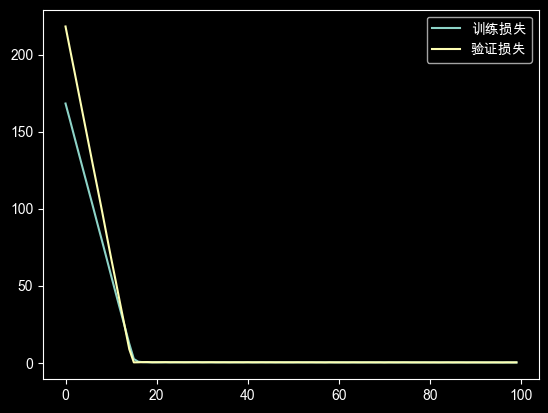

In [18]:
# history 是用来存储模型训练过程中的各种指标变化的
# 可以用来绘制训练过程中的损失和准确率曲线
print(history.history)
print(history.history.keys())
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial Unicode MS'  # 设置字体
# 绘制训练和验证的损失曲线
plt.plot(history.epoch, history.history['loss'], label='训练损失')
plt.plot(history.epoch, history.history['val_loss'], label='验证损失')
plt.legend()
plt.show()

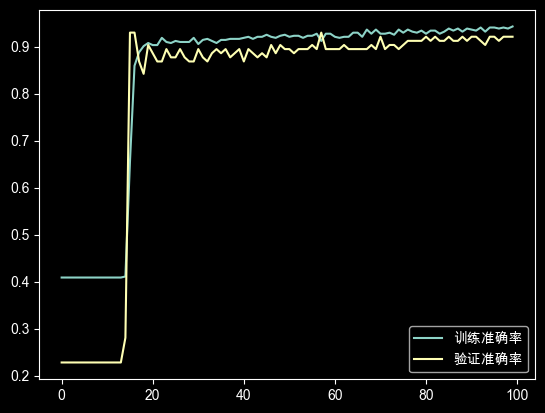

In [19]:
plt.plot(history.epoch, history.history['accuracy'], label='训练准确率')
plt.plot(history.epoch, history.history['val_accuracy'], label='验证准确率')
plt.legend()
plt.show()